In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_name =  '/content/drive/MyDrive/Colab Notebooks/iris.csv'

In [ ]:
iris = pd.read_csv(file_name)
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris = iris.rename(columns={'Species':'Flower_Types'})
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Flower_Types
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [ ]:
label_encoder = sklearn.preprocessing.LabelEncoder()
iris['Flower_Types'] = label_encoder.fit_transform(iris['Flower_Types'])

In [ ]:
iris['Flower_Types']

,Flower_Types
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
x = iris.iloc[:,0:4]
x

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [ ]:
y = iris["Flower_Types"]
y

,Flower_Types
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
iris['Flower_Types'].unique()

array([0, 1, 2])

In [ ]:
iris.Flower_Types.value_counts()

,count
Flower_Types,
0,50
1,50
2,50


In [ ]:
colnames=list(iris.columns)
colnames

['Unnamed: 0',
 'Sepal.Length',
 'Sepal.Width',
 'Petal.Length',
 'Petal.Width',
 'Flower_Types']

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.6, 0.8333333333333334, 'x[0] <= 100.5\nentropy = 1.583\nsamples = 120\nvalue = [41, 37, 42]'),
 Text(0.4, 0.5, 'x[3] <= 2.45\nentropy = 0.998\nsamples = 78\nvalue = [41, 37, 0]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 42\nvalue = [0, 0, 42]'),
 Text(0.7, 0.6666666666666667, '  False')]

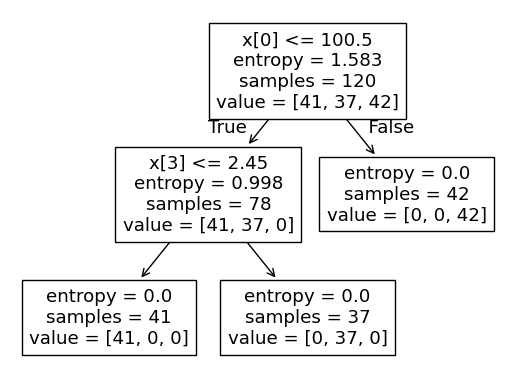

In [ ]:
tree.plot_tree(model)

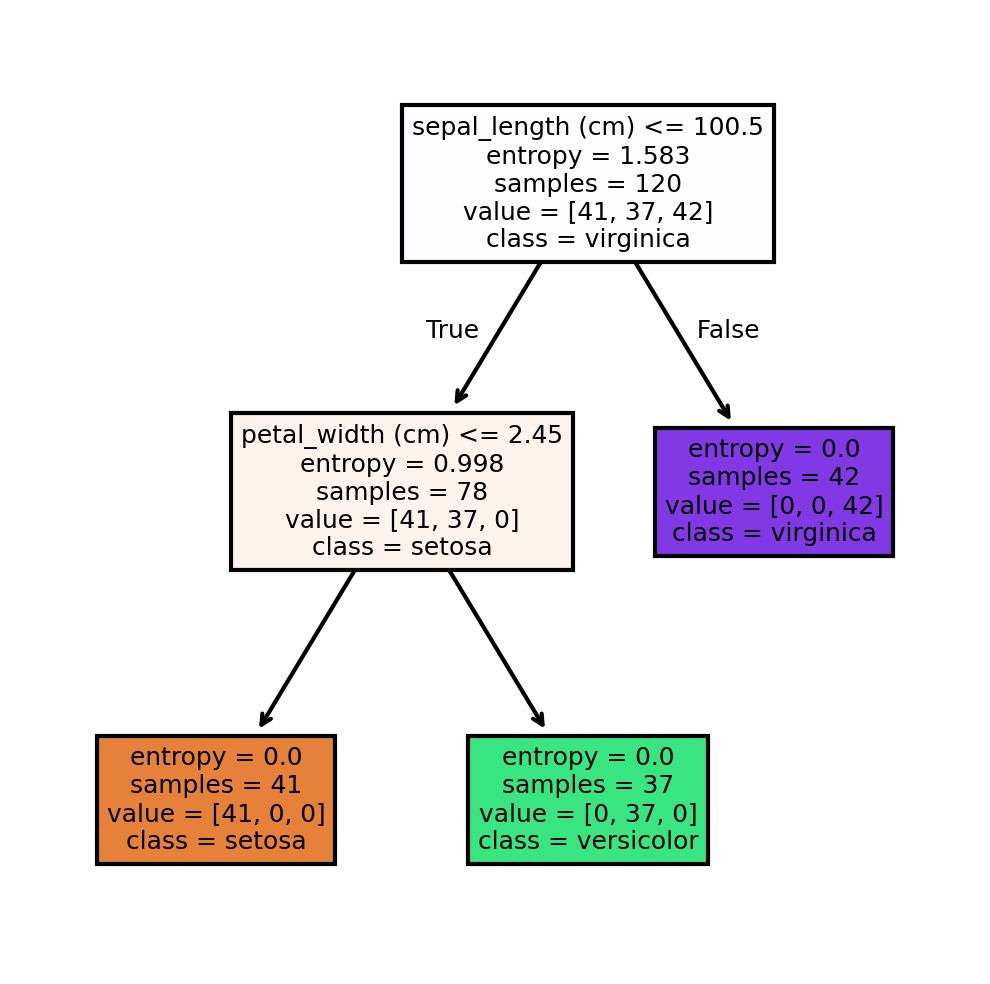

In [ ]:
fn=['sepal_length (cm)','sepal_width (cm)','petal_length (cm)','petal_width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

,count
1,12
2,10
0,8


In [ ]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Flower_Types,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [ ]:
np.mean(preds==y_test)

1.0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
preds=model_gini.predict(x_test)
pd.crosstab(y_test,preds)

col_0,0,1,2
Flower_Types,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array=iris.values
X=array[:,0:3]
Y=array[:,3]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=1)

In [ ]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
model.score(X_test,y_test)

0.9577711861703824